In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

### Load the dataset and plot images from each class

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

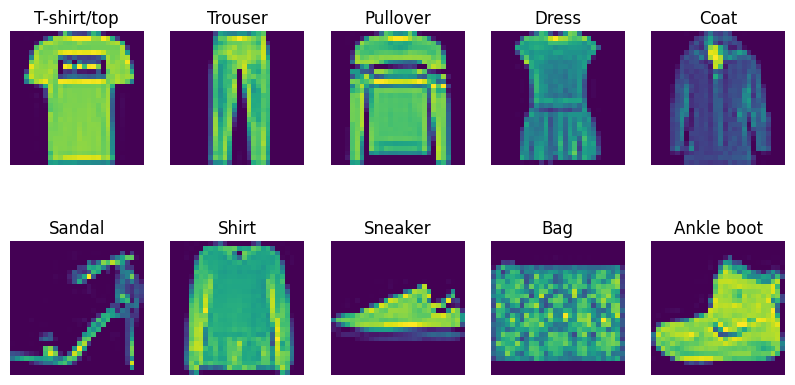

In [5]:
# Class names in Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select sample images
classes = np.unique(y_train)
sample_images = [X_train[np.where(y_train == cls)[0][0]] for cls in classes]

# Plot sample images
plt.figure(figsize = (10, 5))
for i in range(len(classes)):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(class_names[i])
    plt.axis(False)

In [ ]:
# Activation functions

def relu():
    pass

def sigmoid():
    pass

def tanh():
    pass

def softmax():
    pass

In [ ]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers_neurons, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_layers_neurons
        self.output_size = output_size
        self.layer_count = len(self.hidden_sizes) + 1
        self.weights = []
        self.biases = []

        self.sizes = [self.input_size] +  self.hidden_sizes + [self.output_size]
        for i in range(self.layer_count):
            weights = np.random.uniform(-1, 1, (self.sizes[i], self.sizes[i+1]))
            biases = np.random.uniform(-1, 1, (self.sizes[i+1]))
            self.weights.append(weights)
            self.biases.append(biases)

    def forward(self, x):
        output = x

        for i in range(self.layer_count):
            output = np.matmul(output, self.weights[i]) + self.biases[i]
            if i != self.layer_count -1:
                output = 1 / (1 + np.exp(output)) # Sigmoid Activation
            else:
                output = np.exp(output) / np.sum(np.exp(output)) # Softmax Activation
        return output
    
    def backpropagation(self):
        pass


In [65]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(60000, 784)

In [69]:
idx = np.random.randint(0, X_train.shape[0], 32)

data_sample, label_sample = X_train[idx], y_train[idx]

model = NeuralNetwork(
    input_size = 784,
    hidden_layers_neurons = [128, 64, 32],
    output_size = 10
)

model.forward(data_sample)[0]

C:\Users\Siddhant\AppData\Local\Temp\ipykernel_14436\3846182787.py:23: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(output)) # Sigmoid Activation


array([0.00579977, 0.00278255, 0.00010512, 0.00147236, 0.00011267,
       0.0004736 , 0.0014016 , 0.00028714, 0.0002592 , 0.00633236])

In [23]:
class Dataloader:
    def __init__(self, X, y, batch_size = 32, shuffle = False):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.n_samples = X.shape[0]
        self.indices = np.arange(self.n_samples)
        if self.shuffle:
            np.random.shuffle(self.indices)
        
    def __iter__(self):
        self.current_index = 0
        if self.shuffle:
            np.random.shuffle(self.indices)
        return self
    
    def __next__(self):
        if self.current_index >= self.n_samples:
            raise StopIteration
        
        sample_indices = self.indices[self.current_index: min(self.current_index + self.batch_size, self.n_samples-1)]
        batch_X = self.X[sample_indices]
        batch_y = self.y[sample_indices]

        self.current_index += self.batch_size
        return batch_X, batch_y

In [ ]:
# Stochastic Gradient Descent
class SGD():
    pass

In [ ]:
# Cross Entropy Loss
class CrossEntropyLoss():
    pass

In [1]:
model = NeuralNetwork(
    input_size = 784,
    hidden_layers_neurons = [128, 64, 32],
    output_size = 10
)

dataloader = Dataloader()

optimizer = SGD()
loss_fn = CrossEntropyLoss()

epochs = 5

for epoch in epochs:

    for data, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(labels, outputs)
        loss.backward()
        optimizer.update()


NameError: name 'NeuralNetwork' is not defined

In [ ]:
from dataloader import Dataloader
from initializers import RandomUniformInitializer, RandomNormalInitializer, XavierInitialization 
import numpy as np
from keras.datasets import fashion_mnist


class LinearLayer:
    def __init__(self, nin, nout, initializer = RandomUniformInitializer()):
        self.nin = nin
        self.nout = nout

        self.weights, self.bias = initializer.weightsandbiases(self.nin, self.nout)

        self.dweights = np.zeros_like(self.weights)
        self.dbias = np.zeros_like(self.bias)
        self.input = None

    def __call__(self, x):
        self.input = x
        return np.matmul(x, self.weights) + self.bias
    
    def backward(self, grad_output):
        self.dweights = np.matmul(self.input.T, grad_output)
        self.dbias = np.sum(grad_output, axis = 0 , keepdims=True)
        
        grad_input = np.matmul(grad_output, self.weights.T) # dL/dh
        return grad_input


    def parameters(self):
        return [self.weights, self.bias]
    
    def gradients(self):
        return [self.dweights, self.dbias]
    
class Sigmoid:
    def __init__(self):
        self.output = None
    
    def __call__(self, x):
        # Clipping x values for numerical stability
        self.output = 1 / (1 + np.exp(-np.clip(x, -100, 100)))
        return self.output
    
    def backward(self, grad_output):
        return grad_output * self.output * (1 - self.output)
    
    def parameters(self):
        return []
    
    def gradients(self):
        return []
    
class Tanh:
    def __init__(self):
        self.output = None
    
    def __call__(self, x):
        # Using np.tanh for numerical stability
        self.output = np.tanh(x)
        return self.output
    
    def backward(self, grad_output):
        # Derivative of tanh(x) is 1 - tanh(x)^2
        return grad_output * (1 - self.output ** 2)
    
    def parameters(self):
        return []
    
    def gradients(self):
        return []

class ReLU:
    def __init__(self):
        self.output = None
        self.input = None
    
    def __call__(self, x):
        self.input = x
        self.output = np.maximum(0, x)
        return self.output
    
    def backward(self, grad_output):
        # Derivative of ReLU is 1 for x > 0, 0 for x <= 0
        return grad_output * (self.input > 0)
    
    def parameters(self):
        return []
    
    def gradients(self):
        return []

class Softmax:
    def __init__(self):
        self.output = None # Output Probabilities
    
    def __call__(self, x):
        exp_x = np.exp(x - np.max(x, axis = 1, keepdims=True))
        self.output = exp_x / np.sum(exp_x, axis = 1, keepdims=True)
        return self.output
    
    def backward(self, grad_output):
        # derivative of loss function w.r.t. pre-activations going in the softmax layer
        batch_size = self.output.shape[0]
        num_classes = self.output.shape[1]
        grad_input = np.zeros_like(grad_output)
        for i in range(batch_size):
            dy_dh = np.zeros((num_classes, num_classes))

            for j in range(num_classes):
                for k in range(num_classes):
                    if j == k:
                        dy_dh[j, k] = self.output[i, j] * (1 - self.output[i, j])
                    else:
                        dy_dh[j, k] = - self.output[i, j] * self.output[i, k]
            grad_input[i] = np.dot(grad_output[i], dy_dh)
        return grad_input

    def parameters(self):
        return []
    
    def gradients(self):
        return []

class CrossEntropyLoss:
    def __init__(self):
        self.preds = None
        self.targets = None

    def __call__(self, preds, targets):
        self.preds = preds # batch_size x 10
        self.targets = targets # batch_size x 10

        # Targets are One-Hot Encoded
        losses = -np.sum(targets * np.log(self.preds + 1e-15), axis = 1)
        return np.mean(losses)
    
    def backward(self):
        grad = - self.targets / (self.preds + 1e-15)
        return grad # Derivative of loss function w.r.t. predictions (y-hat)
    
class SquaredErrorLoss:
    def __init__(self):
        self.preds = None
        self.targets = None

    def __call__(self, preds, targets):
        self.preds = preds # batch_size x 10
        self.targets = targets # batch_size x 10

        # Targets are One-Hot Encoded
        losses = np.sum((self.targets - self.preds)**2, axis = 1)
        return np.mean(losses)
    
    def backward(self):
        grad = -2 * (self.targets - self.preds)
        return grad # Derivative of loss function w.r.t. predictions (y-hat)

class SGD:
    def __init__(self, parameters = None, learning_rate = 0.001):
        self.parameters = parameters
        self.learning_rate = learning_rate

    def step(self, gradients):
        for parameter, grad in zip(self.parameters, gradients):
            parameter -= self.learning_rate * grad

class MomentumGD:
    def __init__(self, parameters=None, learning_rate=0.001, momentum=0.9):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = [np.zeros_like(param) for param in parameters] if parameters else []

    def step(self, gradients):
        for i, (parameter, grad) in enumerate(zip(self.parameters, gradients)):
            self.velocity[i] = self.momentum * self.velocity[i] - self.learning_rate * grad
            parameter += self.velocity[i]

class NesterovAccGD:
    pass

class RMSProp:
    pass

class Adam:
    pass

class Nadam:
    pass


class NeuralNetwork:
    def __init__(self, layers, loss):
        self.layers = layers
        self.loss = loss

    def forward(self, x):
        self.output = x
        for layer in self.layers:
            self.output = layer(self.output)
        return self.output


    def backward(self):
        grad_output = self.loss.backward() 

        for layer in reversed(self.layers):
            grad_output = layer.backward(grad_output) # This will populate the gradients of all the model parameters

    def parameters(self):
        params = []
        for layer in self.layers:
            params.extend(layer.parameters())
        return params

    def gradients(self):
        grads = []
        for layer in self.layers:
            grads.extend(layer.gradients()) # Return all the model parameter's gradients
        return grads
    
    def prediction(self, x):
        self.output = x
        for layer in self.layers:
            self.output = layer(self.output)
        return self.output
    

def train_step(model, optimizer, x, targets):
    # Forward pass
    predictions = model.forward(x)
    
    # Compute loss
    loss_value = model.loss(predictions, targets)
    
    # Backward pass
    model.backward()
    
    # Update parameters
    optimizer.step(model.gradients())
    
    return loss_value, predictions


input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10


loss_fn = CrossEntropyLoss()

model = NeuralNetwork(
    [LinearLayer(input_size, hidden_sizes[0]),
     Sigmoid(),
     LinearLayer(hidden_sizes[0], hidden_sizes[1]),
     Sigmoid(),
     LinearLayer(hidden_sizes[1], hidden_sizes[2]),
     Sigmoid(),
     LinearLayer(hidden_sizes[2], output_size),
     Softmax()],
     loss = loss_fn
)

optimizer = SGD(model.parameters())


def one_hot_encode(arr, num_classes=10):
    return np.eye(num_classes)[arr]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
y_train = one_hot_encode(y_train)

dataloader = Dataloader(X_train, y_train)
i = 0


epochs = 10
losses = []
for epoch in range(epochs):
    for data, targets in dataloader:
        loss, predictions = train_step(model, optimizer, data, targets)
        i += 1
        if i%100 == 0:
            losses.append(loss)

    


In [77]:
test_dataloader = Dataloader(X_test, y_test)
a = 0
b = 0
for x, y in test_dataloader:
    pred = model.prediction(x)
    a += np.sum(np.argmax(pred, axis = 1) == y)
    b += 32

(array([[-1.17983922,  0.35014784,  1.2642729 , -0.5698995 , -0.23403577],
        [ 0.44551593,  0.32928794, -1.26740361, -1.0845386 , -0.95558725],
        [-0.40370188,  0.86220686, -0.24041488,  0.40396571,  0.6999232 ]]),
 array([[-0.53028691,  2.24351005, -2.07703183,  0.41540616, -1.05586874]]))